In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 320us/sample - loss: 0.2204 - acc: 0.9341 - val_loss: 0.0990 - val_acc: 0.9699
Epoch 2/5
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0945 - acc: 0.9703 - val_loss: 0.0752 - val_acc: 0.9761
Epoch 3/5
60000/60000 [==============================] - 15s 253us/sample - loss: 0.0681 - acc: 0.9787 - val_loss: 0.0672 - val_acc: 0.9791
Epoch 4/5
60000/60000 [==============================] - 15s 243us/sample - loss: 0.0531 - acc: 0.9825 - val_loss: 0.0645 - val_acc: 0.9800
Epoch 5/5
60000/60000 [==============================] - 17s 281us/sample - loss: 0.0432 - acc: 0.9858 - val_loss: 0.0660 - val_acc: 0.9808


In [12]:
import matplotlib.pyplot as plt
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, 5 + 1)

    plt.plot(e, metric, 'r', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

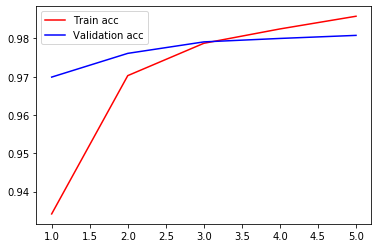

In [13]:
eval_metric(history, 'acc')

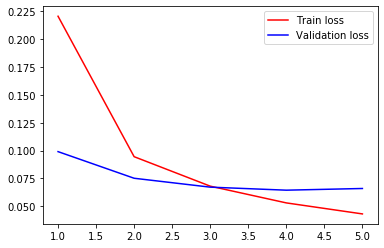

In [14]:
eval_metric(history, 'loss')